In [82]:
%pylab inline
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
import urllib
import json
import numpy as _np

Populating the interactive namespace from numpy and matplotlib


C:\Users\choll\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


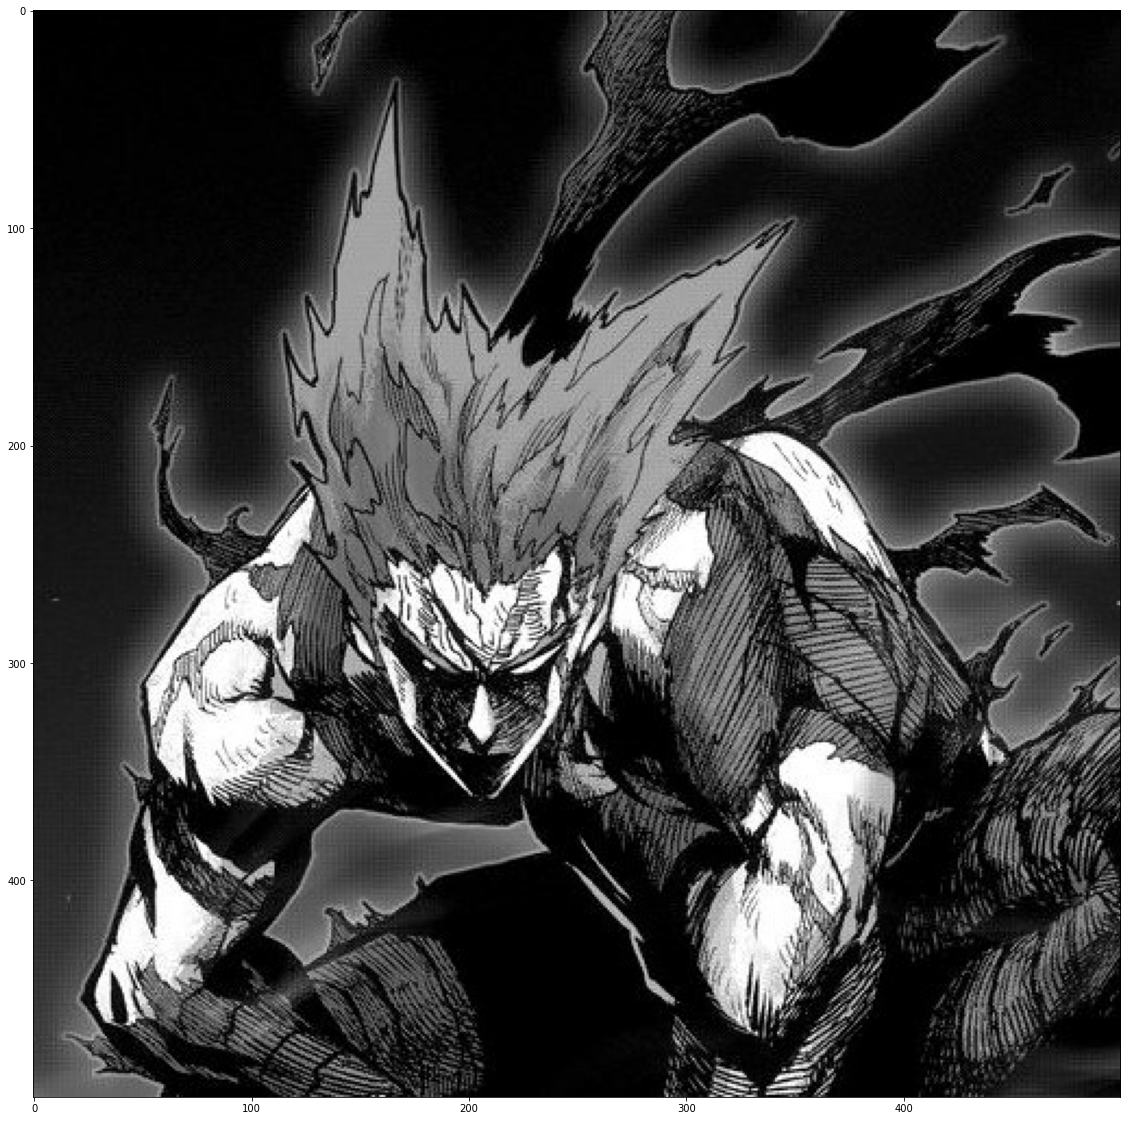

In [245]:
#black_n_white_image = 'shin.jpg'
black_n_white_image = 'garou.jpg'
fig, ax = plt.subplots(figsize=(20, 20))
img = mpimg.imread(black_n_white_image)
imgplot = plt.imshow(img)
plt.show()

# Use AI to Color the Image

In [246]:
r = requests.post(
    "https://api.deepai.org/api/colorizer",
    files={
        'image': open(black_n_white_image, 'rb'),
    },
    headers={'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'}
)
print(r.json())

{'id': '59959fd5-116b-479e-81b0-99447002e4e5', 'output_url': 'https://api.deepai.org/job-view-file/59959fd5-116b-479e-81b0-99447002e4e5/outputs/output.jpg'}


# Download the Image From the AI URL

In [247]:
#colored_image = 'kingdom.jpg'
colored_image = 'opm.jpg'
url = r.json()['output_url']
urllib.request.urlretrieve(url, colored_image)

('opm.jpg', <http.client.HTTPMessage at 0x20b40e46a00>)

# Take A Look At the Image

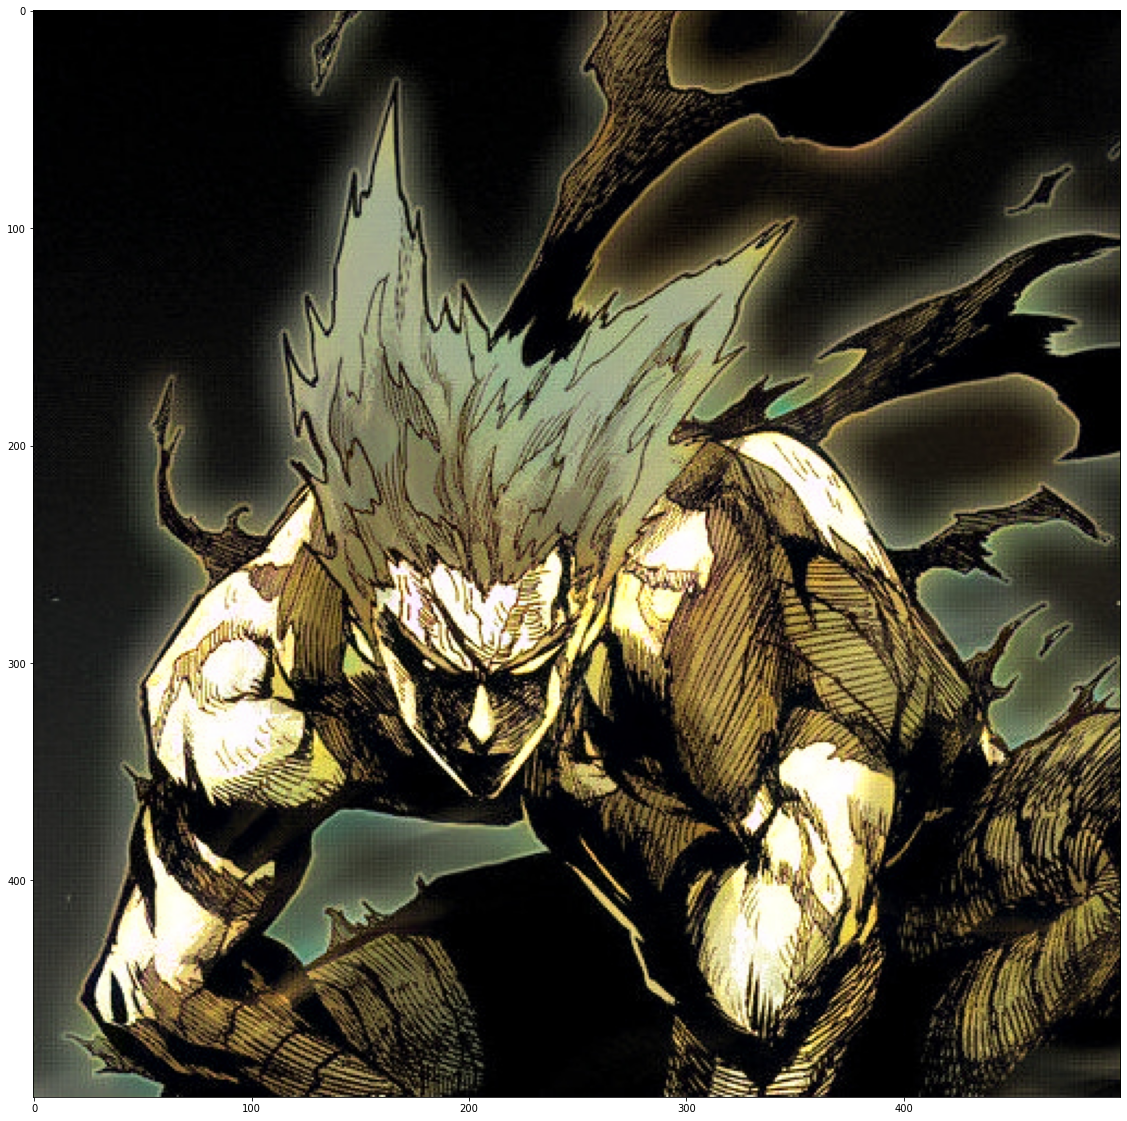

In [248]:
fig, ax = plt.subplots(figsize=(20, 20))
img = mpimg.imread(colored_image)
imgplot = plt.imshow(img)
plt.show()

# Test Pixel Color

In [249]:
colors = PIL.Image.open(colored_image)
colors_rgb = colors.convert("RGB")

In [250]:
width, height = colors.size

In [251]:
pixel_image_size = 50
new_image = [[[0]*3]*pixel_image_size]*pixel_image_size
new_image = _np.asarray(new_image)

In [252]:
pixel_interval = width/pixel_image_size
def square_color_average(n, m):
    red = 0
    blue = 0
    green = 0
    for i in range(int(m*pixel_interval), int((m+1)*pixel_interval)):
        for k in range(int(n*pixel_interval), int((n+1)*pixel_interval)):
            rgb_pixel_value = colors_rgb.getpixel((i, k))
            red += rgb_pixel_value[0]
            green += rgb_pixel_value[1]
            blue += rgb_pixel_value[2]
    #print(red, green, blue)
    avg_red = round(red/pixel_interval**2)
    avg_green = round(green/pixel_interval**2)
    avg_blue = round(blue/pixel_interval**2)
    return(avg_red, avg_green, avg_blue)

In [253]:
for ii in range(pixel_image_size):
    for nn in range(pixel_image_size):
        r, g, b = square_color_average(ii, nn)
        x = [r, g, b]
        new_image[ii][nn] = _np.asarray(x)

In [254]:
test_t = _np.transpose(new_image)

In [255]:
x = _np.asarray(new_image)
img = PIL.Image.fromarray(x.astype('uint8'))
img.save('pixel.png')

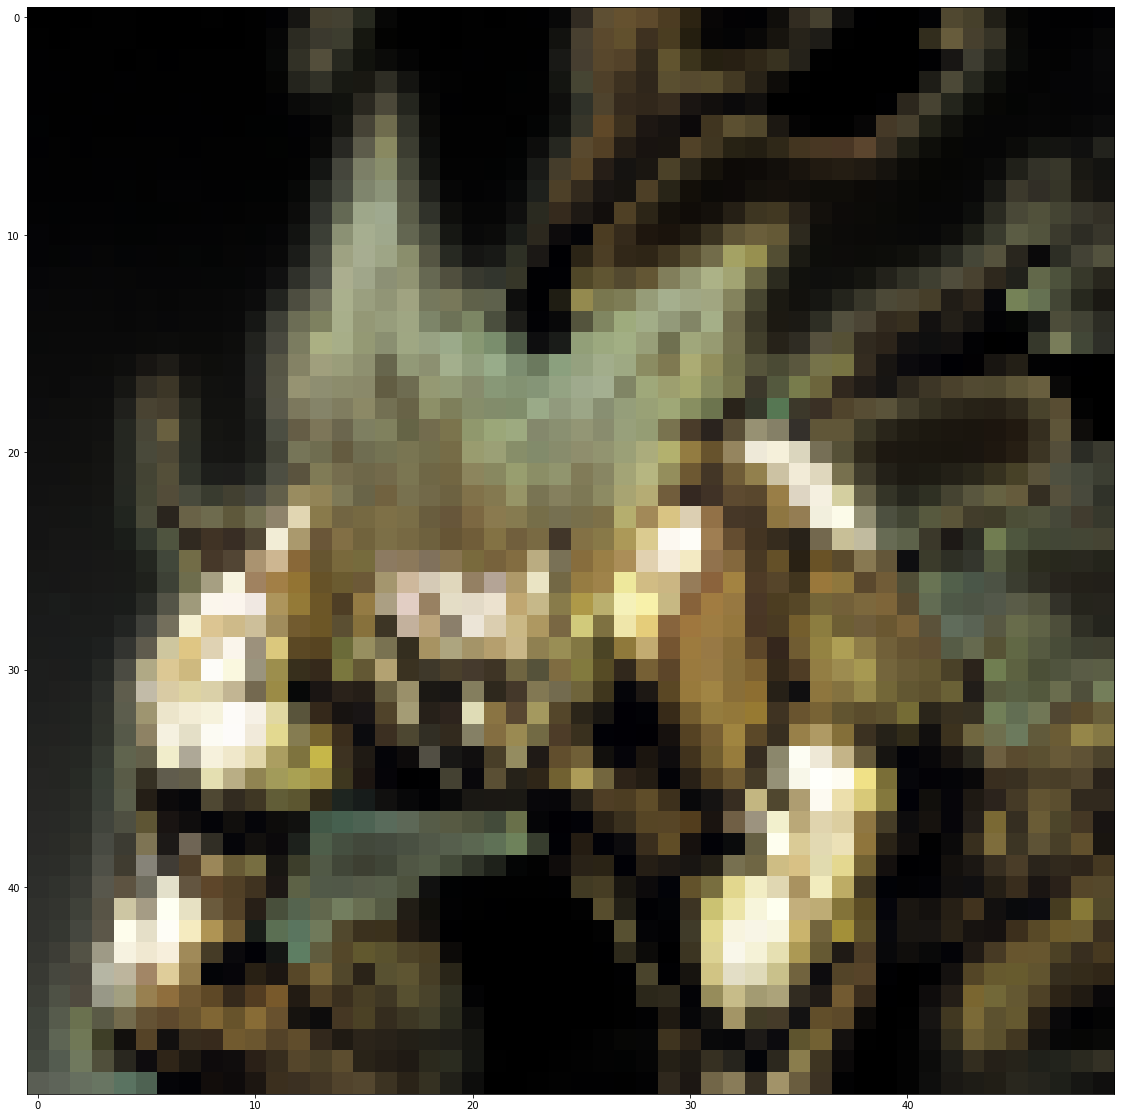

In [256]:
fig, ax = plt.subplots(figsize=(20, 20))
img = mpimg.imread('pixel.png')
imgplot = plt.imshow(img)
plt.show()